In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns
sns.set()
import warnings

warnings.filterwarnings("ignore")

In [2]:
#filepath=r'C:\Users\harsh\Desktop'
data_cereal=pd.read_csv('cereal.csv')
data_cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
data1=data_cereal.drop(columns=['mfr','name','type'])
data1.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


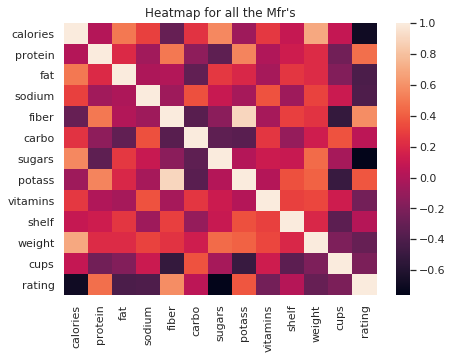

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(data=data1.corr())
plt.title("Heatmap for all the Mfr's")
plt.savefig('whole_heatmap.png')

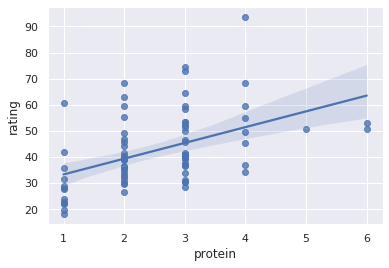

In [5]:
#regression plot 
sns.regplot(x='protein',y='rating',data=data_cereal)

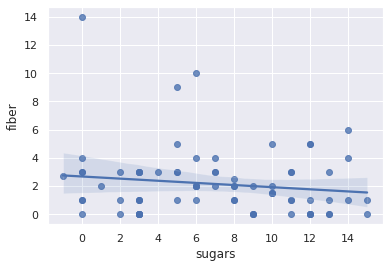

In [6]:
sns.regplot(x='sugars',y='fiber',data=data_cereal)

In [7]:
#K-Means to cluster the rating column

from sklearn.cluster import KMeans
X=data_cereal.iloc[:,15].values
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(X.reshape(-1,1))
y_kmeans=kmeans.predict(X.reshape(-1,1))
y_kmeans

array([1, 0, 1, 2, 0, 4, 0, 0, 3, 3, 4, 3, 4, 0, 4, 0, 3, 0, 4, 0, 1, 3,
       0, 3, 4, 4, 1, 0, 0, 4, 0, 4, 3, 3, 3, 4, 4, 4, 0, 0, 0, 3, 4, 3,
       0, 0, 4, 0, 4, 0, 1, 4, 0, 0, 1, 1, 3, 3, 0, 0, 3, 0, 0, 1, 1, 1,
       4, 3, 1, 0, 4, 3, 0, 4, 3, 3, 0], dtype=int32)

In [8]:
data_cereal['K-Means']=y_kmeans
data_cereal.head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,K-Means
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,1
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,2
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,0


Text(0.5, 1.0, 'Rating vs K-Means score')

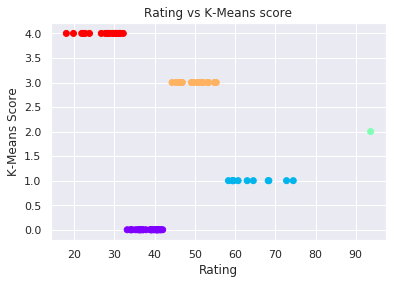

In [9]:
plt.scatter(data_cereal['rating'],y_kmeans,cmap='rainbow',c=y_kmeans)
plt.xlabel('Rating')
plt.ylabel('K-Means Score')
plt.title('Rating vs K-Means score')

In [10]:
#K-Means to cluster the calories column

from sklearn.cluster import KMeans
X=data_cereal.iloc[:,3].values
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(X.reshape(-1,1))
y_kmeans=kmeans.predict(X.reshape(-1,1))
y_kmeans

array([1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0, 0.5, 'calories')

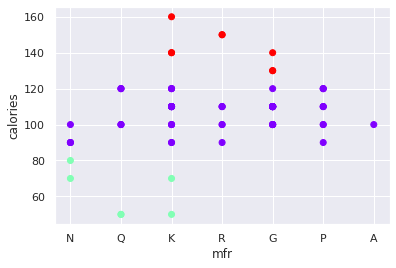

In [11]:
plt.scatter(y=data_cereal['calories'],x=data_cereal['mfr'],cmap='rainbow',c=y_kmeans)
plt.xlabel('mfr')
plt.ylabel('calories')
#plt.title('Rating vs K-Means score')

In [12]:
#KNN to see if we can predict the rating from some features

from sklearn.neighbors import KNeighborsClassifier
X=data_cereal[['protein','fiber','potass']].values
y=data_cereal.iloc[:,16].values

In [13]:
from sklearn import preprocessing

min_max=preprocessing.MinMaxScaler()
X_scaled=min_max.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0,
                                  train_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
Y_pred=knn.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,Y_pred))


Accuracy: 0.2777777777777778


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))

[[ 8  2  0 10  2]
 [ 4  0  0  3  1]
 [ 1  0  0  0  0]
 [10  0  0  1  1]
 [ 2  0  0  3  6]]
              precision    recall  f1-score   support

           0       0.32      0.36      0.34        22
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           3       0.06      0.08      0.07        12
           4       0.60      0.55      0.57        11

    accuracy                           0.28        54
   macro avg       0.20      0.20      0.20        54
weighted avg       0.27      0.28      0.27        54



In [36]:
#Random forest Classifier for predicting the mfr using the features

X_=data_cereal.iloc[:,0]
#X_r=X_.reshape(-1,1)
y_r=data_cereal.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X_, y_r, random_state=0,train_size=0.3)


from sklearn.ensemble import RandomForestClassifier


#mo=make_pipeline(TfidfVectorizer(),RandomForestClassifier(n_estimators=50))

model=RandomForestClassifier(n_estimators=100)

mo.fit(X_train,y_train)

y_pred=mo.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.3148148148148148
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           G       0.25      0.13      0.17        15
           K       0.30      0.79      0.43        14
           N       0.25      0.33      0.29         3
           P       0.00      0.00      0.00         7
           Q       0.00      0.00      0.00         8
           R       1.00      0.50      0.67         6

    accuracy                           0.31        54
   macro avg       0.26      0.25      0.22        54
weighted avg       0.27      0.31      0.25        54

[[ 0  0  1  0  0  0  0]
 [ 0  2 11  1  1  0  0]
 [ 0  3 11  0  0  0  0]
 [ 0  0  2  1  0  0  0]
 [ 0  1  6  0  0  0  0]
 [ 0  2  4  1  1  0  0]
 [ 0  0  2  1  0  0  3]]


In [17]:
#Plotting of the bar charts 

def demo_plot_and_yield():
    yield
    plt.title('Fiber by MFR')
    sns.barplot(x=data_cereal['fiber'],y=data_cereal['mfr'])
    yield
    plt.title('Protein by MFR')
    sns.barplot(x=data_cereal['protein'],y=data_cereal['mfr'])
    yield
    plt.title('Fat by MFR')
    sns.barplot(x=data_cereal['fat'],y=data_cereal['mfr'])
    yield
    plt.title('Calories by MFR')
    sns.barplot(x=data_cereal['calories'],y=data_cereal['mfr'])
    yield
    plt.title('Sodium by MFR')
    sns.barplot(x=data_cereal['sodium'],y=data_cereal['mfr'])
    yield
    plt.title('Ratings by MFR')
    sns.barplot(x=data_cereal['rating'],y=data_cereal['mfr'])

In [18]:
def multiplot_from_generator(g, num_columns, figsize_for_one_row=None):
    # call 'next(g)' to get past the first 'yield'
    next(g)
    # default to 15-inch rows, with square subplots
    if figsize_for_one_row is None:
        figsize_for_one_row = (10, 10/num_columns)
    try:
        while True:
            # call plt.figure once per row
            plt.figure(figsize=figsize_for_one_row)
            for col in range(num_columns):
                ax = plt.subplot(1, num_columns, col+1)
                next(g)
    except StopIteration:
        pass

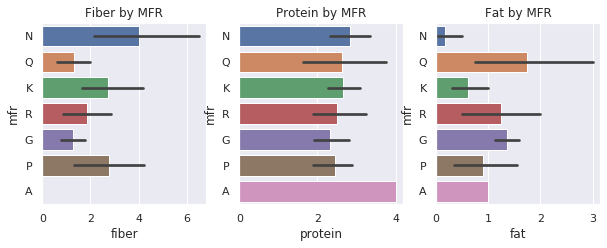

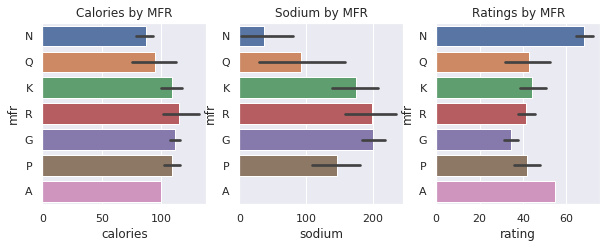

In [19]:
multiplot_from_generator(demo_plot_and_yield(), 3)
#plt.savefig('BarCharts')

In [28]:
X_NB=data_cereal.iloc[:,0]
y_NB=data_cereal.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X_NB,y_NB, random_state=0,train_size=0.3)

Accuracy: 0.6666666666666666
[[ 9 12]
 [ 6 27]]
              precision    recall  f1-score   support

     healthy       0.60      0.43      0.50        21
   unhealthy       0.69      0.82      0.75        33

    accuracy                           0.67        54
   macro avg       0.65      0.62      0.62        54
weighted avg       0.66      0.67      0.65        54



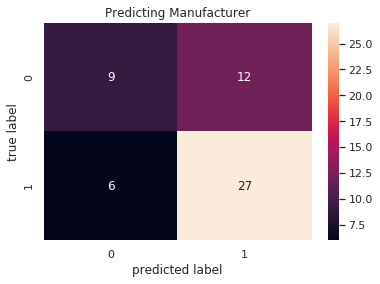

In [29]:
#using brand name to predict features
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#model=GaussianNB()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,prediction)

sns.heatmap(mat,annot=True)
plt.title('Predicting Manufacturer')
plt.xlabel('predicted label')
plt.ylabel('true label')

#Confusion matrix for the above method
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

In [22]:
from sklearn.decomposition import PCA

d_X=data_cereal.iloc[:,3:14].values
y=data_cereal.iloc[:,15]
model1=PCA(n_components=2)
x=min_max.fit_transform(d_X)

x_2d=model1.fit_transform(x)


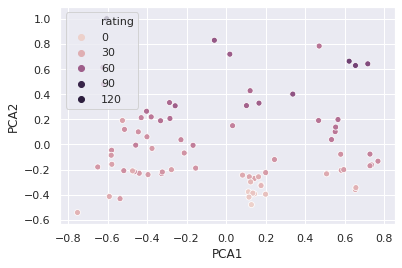

In [23]:

data_cereal['PCA1']=x_2d[:,0]
data_cereal['PCA2']=x_2d[:,1]
sns.scatterplot('PCA1','PCA2',data=data_cereal,hue='rating')

In [24]:
X_r=data_cereal['sugars'].values.reshape(-1,1)
y_r=data_cereal['rating']

from sklearn.linear_model import LinearRegression 

mod=LinearRegression()

mod.fit(X_r,y_r)

y_pred=mod.predict(X_r)

from sklearn.metrics import  r2_score

print(r2_score(y_r,y_pred))

0.5771055866609012


In [25]:
# Dividing cereal as good and bad by giving the limit for the quality
bins = (18.0, 43.0, 100.0)
group_names = ['unhealthy','healthy']
data_cereal['rating'] = pd.cut(data_cereal['rating'], bins = bins, labels = group_names)
data_cereal.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,K-Means,PCA1,PCA2
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,healthy,1,-0.623826,0.614965
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,unhealthy,0,-0.524672,0.191147
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,healthy,1,-0.621761,0.480537
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,healthy,2,-0.604454,1.003456
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,unhealthy,0,-0.276739,-0.201391
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,unhealthy,4,0.510628,-0.232905
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,unhealthy,0,0.143746,-0.271235
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,unhealthy,0,-0.439626,-0.229952
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,healthy,3,0.533854,0.038933
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,healthy,3,-0.402674,0.264939


In [26]:
data_cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,K-Means,PCA1,PCA2
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,healthy,1,-0.623826,0.614965
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,unhealthy,0,-0.524672,0.191147
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,healthy,1,-0.621761,0.480537
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,healthy,2,-0.604454,1.003456
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,unhealthy,0,-0.276739,-0.201391


Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

     healthy       0.62      0.38      0.47        21
   unhealthy       0.68      0.85      0.76        33

    accuracy                           0.67        54
   macro avg       0.65      0.61      0.61        54
weighted avg       0.66      0.67      0.65        54

[[ 8 13]
 [ 5 28]]


Text(30.5, 0.5, 'true label')

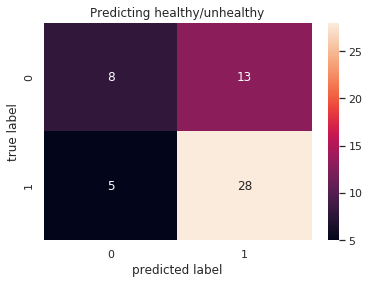

In [27]:
#Random forest Classifier for predicting the healthy/unhealthy rating using the name 

X_r=data_cereal.iloc[:,0]
y_r=data_cereal.iloc[:,15]


X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, random_state=0,train_size=0.3)


from sklearn.ensemble import RandomForestClassifier


mo=make_pipeline(TfidfVectorizer(),RandomForestClassifier(n_estimators=100))

#model=RandomForestClassifier(n_estimators=100)

mo.fit(X_train,y_train)

y_pred=mo.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat,annot=True)
plt.title('Predicting healthy/unhealthy')
plt.xlabel('predicted label')
plt.ylabel('true label')
